# Healthcare data EDA

In [273]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option("display.max_rows", None) 

## Healthcare dataset attributes

- **Name**: Column represents patient's name on health record <br>
- **Age**: age of patient at time of admission in years <br>
- **Gender**: patient gender either "Male" or "Female" <br>
- **Blood type**: Patient's bloodtype of the common ones "A+", "O-" etc <br>
- **Medical condition**: primary medical condition or diagnosis associated with patient <br>
- **Date of admission**: date patient was admitted to the facility <br>
- **Doctor**: Name of doctor responsible for care during admission <br>
- **Hospital**: Name of hospital or facility where patient was admitted <br>
- **Insurance provider**: patient's insurance provider <br>
- **Billing amount**: amount of money billed to patient for their healthcare services during admission <br>
- **Room number**: Room number where patient was accomodated during admission <br>
- **Discharge date**: Date patient was discharged from healthcare facility <br>
- **Medication**: Identifies medication prescribed during their admission <br>
- **Test results**: Describes the results of medical tests conducted during patient's admission




In [2]:
# Load healthcare data
data = pd.read_csv('./data/healthcare_dataset.csv')

data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Data cleaning

In [3]:
data.shape

(55500, 15)

In [18]:
# Check for missing data 
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


Note: The minimum billing amount is negative - could suggest multiple entries per person?

In [149]:
# Count number of negative billing amount entries
(data['Billing Amount']<0).sum()

108

In [201]:
# Find the people with multiple entries/ duplicates with the same name 

# Convert Name strings to all lowercase
data['Name'] = data['Name'].str.lower()

# Number of unique names
print (f'Number of unique names : {data['Name'].nunique()}')

# Count the number of entries per name
duplicate_values = data['Name'].value_counts()

# Names that occur twice or more
items_occurring_more = duplicate_values[duplicate_values >= 2].index
print(f'Name with more two or more entries: {items_occurring_more}')

print (f'Number of unique names in duplicate names list : {items_occurring_more.nunique()}')

Number of unique names : 40235
Name with more two or more entries: Index(['michael williams', 'michael smith', 'robert smith', 'james brown',
       'james smith', 'james williams', 'john smith', 'john johnson',
       'kimberly smith', 'david johnson',
       ...
       'marisa golden', 'todd garrett', 'justin griffin', 'julie rojas',
       'amy owen', 'kathleen coleman', 'nancy hamilton', 'laura ryan',
       'danielle ingram', 'katie johnson'],
      dtype='object', name='Name', length=9740)
Number of unique names in duplicate names list : 9740


In [242]:
# Get rows with Name occuring twice or more in the dataset
filtered_rows = data[data['Name'].isin(items_occurring_more)]
print (f'Total number of duplicates in dataset: {len(filtered_rows)}')

Total number of duplicates in dataset: 25005


There are duplicate people with the same name, different ages but some have the same dates of admission and room numbers, medication etc. i.e. with many signs that there are duplicate entries except with differences in e.g. Age. <br>
Lets have a deeper look at some examples below.


In [196]:
data.loc[data['Name'] == 'michael williams']

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
2021,michael williams,38,Male,AB-,Cancer,2021-08-07,Kenneth Vargas,"Richmond, and Williams Cabrera",UnitedHealthcare,47511.507353,327,Urgent,2021-08-14,Lipitor,Normal
2983,michael williams,50,Female,O+,Cancer,2020-05-11,Jason Sanchez,Randall-Juarez,Cigna,2953.357870,234,Emergency,2020-06-07,Ibuprofen,Normal
6086,michael williams,55,Male,A-,Hypertension,2019-12-05,Jamie Hodges,LLC Taylor,Cigna,8407.060526,359,Elective,2019-12-15,Lipitor,Normal
7339,michael williams,49,Male,AB-,Diabetes,2023-03-29,Sarah King,"Medina, and Forbes Arnold",Cigna,4678.553455,174,Urgent,2023-04-06,Ibuprofen,Abnormal
7431,michael williams,85,Female,O+,Cancer,2022-07-14,Rachel Ramirez,Thompson Ltd,Medicare,19373.416683,487,Emergency,2022-08-03,Lipitor,Abnormal
7688,michael williams,40,Female,A+,Diabetes,2023-11-19,Julie Little,Wood-Noble,UnitedHealthcare,7659.045824,284,Urgent,2023-11-29,Penicillin,Normal
11431,michael williams,47,Male,AB-,Diabetes,2020-12-25,Jared Rasmussen,"and Harris Brewer, Young",UnitedHealthcare,20170.808021,455,Urgent,2020-12-27,Aspirin,Inconclusive
14894,michael williams,23,Female,A+,Obesity,2021-09-14,Scott Cox,"Reyes and Walker Woods,",Aetna,37243.522084,224,Urgent,2021-10-09,Aspirin,Abnormal
15187,michael williams,70,Male,B+,Asthma,2022-06-30,John Gonzalez,"Weaver Davis Bates, and",Aetna,4697.732433,116,Emergency,2022-07-07,Penicillin,Inconclusive
20430,michael williams,38,Female,B-,Diabetes,2021-10-12,Jake Patel,Abbott-Coleman,Cigna,19751.999497,392,Emergency,2021-10-17,Paracetamol,Inconclusive


In [178]:
data.loc[data['Name'] == 'david munoz']

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
2491,david munoz,31,Male,AB+,Diabetes,2022-12-20,Maurice Davis,Wall-Weaver,Medicare,25773.328236,406,Elective,2023-01-09,Penicillin,Inconclusive
46648,david munoz,19,Male,A-,Cancer,2022-08-04,Jamie Gonzales,Olsen-Thomas,Blue Cross,32454.950609,406,Urgent,2022-08-17,Aspirin,Inconclusive
53672,david munoz,28,Male,AB+,Diabetes,2022-12-20,Maurice Davis,Wall-Weaver,Medicare,25773.328236,406,Elective,2023-01-09,Penicillin,Inconclusive


In [308]:
# Explore a few more ...
for name in filtered_rows['Name'][0:5]:
    print (filtered_rows.loc[data['Name'] == name])

                Name  Age  Gender Blood Type Medical Condition  \
4      adrienne bell   43  Female        AB+            Cancer   
50144  adrienne bell   44  Female        AB+            Cancer   

      Date of Admission          Doctor     Hospital Insurance Provider  \
4            2022-09-19  Kathleen Hanna  White-White              Aetna   
50144        2022-09-19  Kathleen Hanna  White-White              Aetna   

       Billing Amount  Room Number Admission Type Discharge Date  Medication  \
4        14238.317814          458         Urgent     2022-10-09  Penicillin   
50144    14238.317814          458         Urgent     2022-10-09  Penicillin   

      Test Results  
4         Abnormal  
50144     Abnormal  
                Name  Age  Gender Blood Type Medical Condition  \
5      emily johnson   36    Male         A+            Asthma   
29074  emily johnson   29  Female         A-         Arthritis   
35317  emily johnson   19  Female         A+            Cancer   
37505  

In [195]:
# Are duplicate entires of people associated with being reinbursed i.e. a change in billing amount? 
refund = data.loc[data['Billing Amount'] < 0]
filtered_refund = refund.isin(filtered_rows)
filtered_refund['Name'].value_counts()

Name
False    60
True     48
Name: count, dtype: int64

From exploration above, lets define what we are going to class as a 'duplicate' in this dataset and then we will handle them. <br>

A **duplicate** is one where the **Name**, **Date of Admission**, **Discharge Date**, **Gender** and **Blood Types**  are the same as another entry. <br>

I have ensured Billing Amount is not included in the list as charges to a given person may change whilst the rest of the factors remain the same. Similarly, duplicates are depend on entries with the same dates of admission and discharge count as separate events for the same person visiting on different occasions. 

In [283]:
# Handling duplicates
# Using the subset 'filtered_rows', get duplicates based on criteria
duplicate_mask = filtered_rows.duplicated(
    subset=['Name', 'Blood Type', 'Date of Admission', 'Discharge Date'], 
    keep='first'
)

duplicate_indices = filtered_rows[duplicate_mask].index
print(f"Number of true duplicates to remove: {len(duplicate_indices)}")

Number of true duplicates to remove: 5500


In [284]:
# Drop duplicates based on indices from original dataset
data_clean = data.drop(index=duplicate_indices)
print(f"Final cleaned dataset shape: {data_clean.shape}")

Final cleaned dataset shape: (50000, 15)


In [300]:
# Save cleaned data to csv
data_clean.to_csv('./data/healthcare_dataset_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

In [302]:
# Read in cleaned data
df = pd.read_csv('./data/healthcare_dataset_clean.csv')

The average number of admissions for a given month is 4166.666666666667


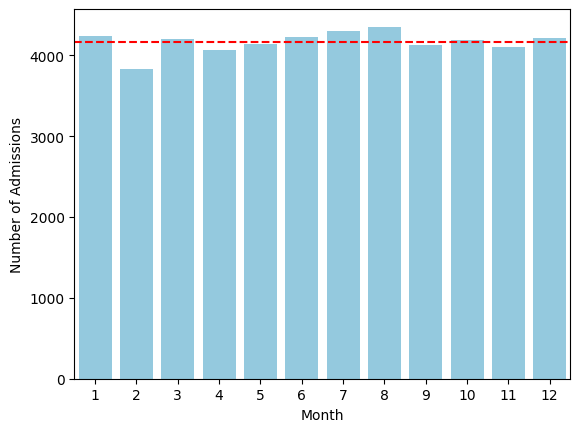

In [286]:
# Hospital admissions per month
admissions_per_month = pd.to_datetime(df['Date of Admission']).dt.month.value_counts().sort_index()
average_admissions= sum(admissions_per_month)/len(admissions_per_month)

# sns.barplot(admissions_per_month, x='Month', y='Number of patients admitted')
sns.barplot(admissions_per_month, color='skyblue')
plt.axhline(y=average_admissions, color='r', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')

print(f'The average number of admissions for a given month is {average_admissions}')

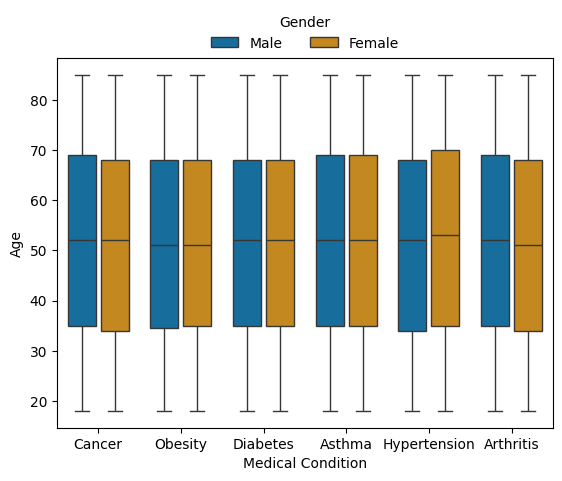

In [298]:
# Relationship between age and medical condition and gender
ax=sns.boxplot(data=df, x='Medical Condition', y='Age', hue='Gender', gap=0.15, palette='colorblind')
sns.move_legend(ax,"upper center", bbox_to_anchor=(0.5, 1.15), frameon=False, ncol=2)


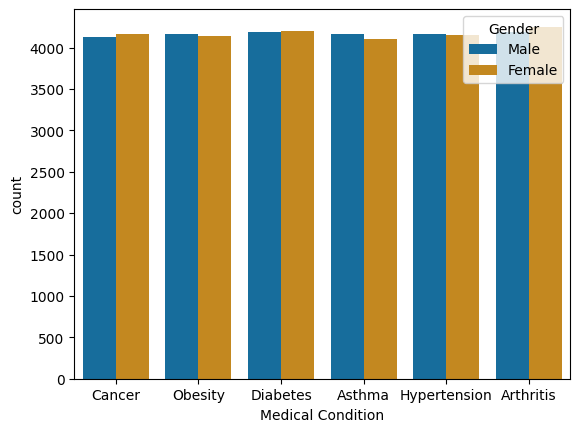

In [306]:
# Medical condition vs gender
plot=sns.countplot(data=df, x='Medical Condition', hue='Gender', palette='colorblind')

Test Results by Medical Condition:
Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis              2908          2789    2742
Asthma                 2697          2721    2854
Cancer                 2797          2751    2746
Diabetes               2831          2766    2787
Hypertension           2721          2789    2809
Obesity                2818          2728    2746


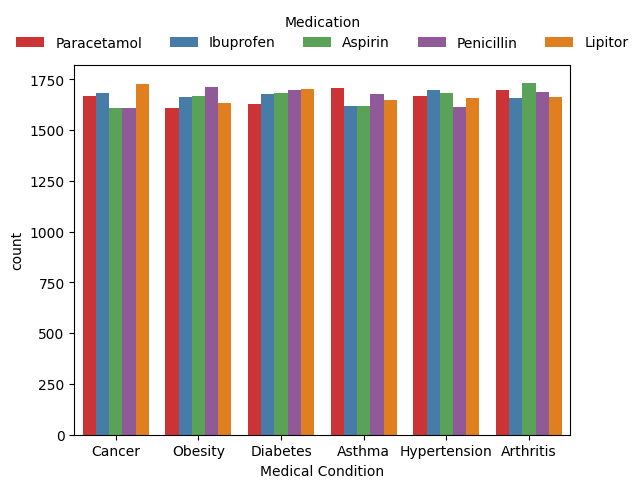

In [265]:
# Test results for each medical condition
condition_vs_test = df.groupby('Medical Condition')['Test Results'].value_counts().unstack()
print("Test Results by Medical Condition:")
print(condition_vs_test)

# Visualise medication prescribed to the medical condition
plot=sns.countplot(data=df, x='Medical Condition', hue='Medication', palette='Set1')
sns.move_legend(plot,"upper center", bbox_to_anchor=(0.5, 1.17), frameon=False, ncol=5)


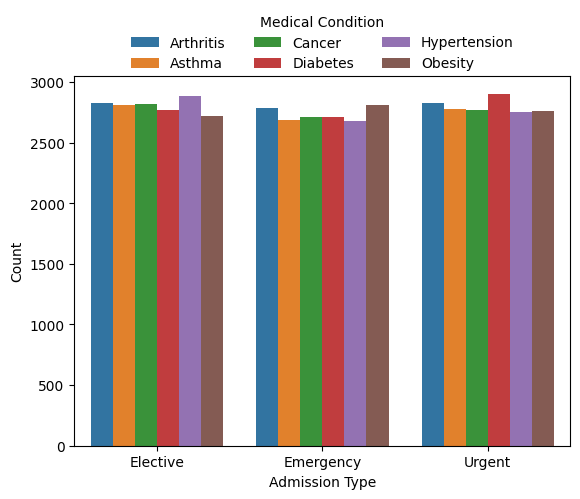

In [266]:
# Patient count by admission type and medical condition 
admission_grouped = df.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')

ad_plot=sns.barplot(data= admission_grouped, x='Admission Type',y='Count', hue='Medical Condition'  )
sns.move_legend(ad_plot,"upper center", bbox_to_anchor=(0.5, 1.2), frameon=False, ncol=3)

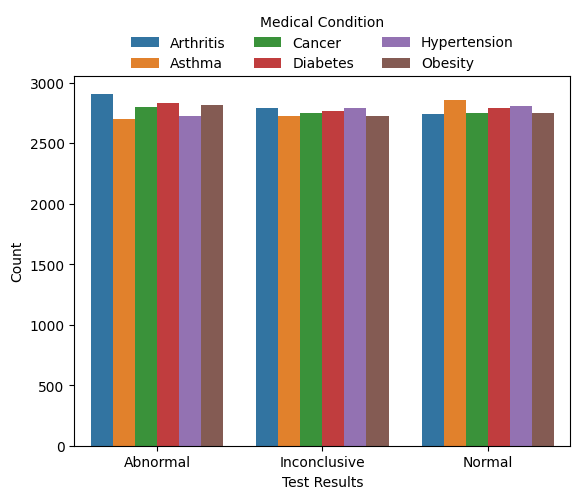

In [312]:
# test results vs. disease
df.head()

# Patient count by admission type and medical condition 
test_grouped = df.groupby(['Test Results', 'Medical Condition']).size().reset_index(name='Count')

test_plot=sns.barplot(data= test_grouped, x='Test Results',y='Count', hue='Medical Condition'  )
sns.move_legend(test_plot,"upper center", bbox_to_anchor=(0.5, 1.2), frameon=False, ncol=3)

## Key Observations from EDA:
- The data does not contain missing values that need to be handled. <br>
- Further exploration of data showed potential duplicate entries for the same person, therefore those duplicates were removed from the dataset if entries had identical name, admission and discharge dates, blood type and gender. <br>
- The data shows little variation in hospital admission numbers per month with the average being ~4167 <br>
- There is a large age range for each medical conditions with the median, lower and upper quartile ranges being quite similar for each condition. <br>
- All medications are used to treat each medical condition by similar amounts. <br>
- The gender divide for medical condtions is approximately equal between male and female patients. 